## 지하철 시간대별 데이터 시각화

아침 7시~8시 

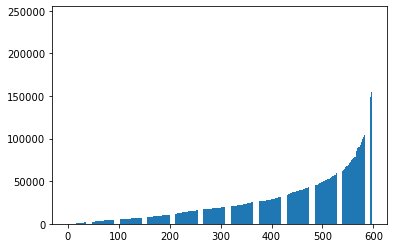

In [16]:
import csv;
import matplotlib.pyplot as plt

f = open('subwaytime.csv')
data = csv.reader(f)

# 헤더 (행) 2줄 제거
next(data)
next(data)

result = []
for row in data:
    #4열부터 int 형으로 변환
    row[4:] = map(int, row[4:])
    #10열 -> 7시~7시59분
    result.append(row[10])
#print(len(result))

#오름차순
result.sort()
plt.bar(range(len(result)), result)
plt.show()

아침 7시 ~ 9시59분 승차 인원

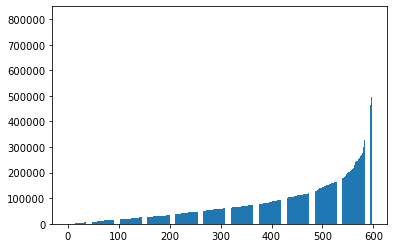

In [18]:
import csv;
import matplotlib.pyplot as plt

f = open('subwaytime.csv')
data = csv.reader(f)

# 헤더 (행) 2줄 제거
next(data)
next(data)

result = []
for row in data:
    #4열부터 int 형으로 변환
    row[4:] = map(int, row[4:])
    #10, 12, 14열 인덱스 값 모두 더하기 (10~15열 2열씩 띄우기)
    result.append(sum(row[10:15:2]))
#print(len(result))

#오름차순
result.sort()
plt.bar(range(len(result)), result)
plt.show()

7시 ~ 9시 59분까지의 승차 인원 중 가장 많은 곳

In [25]:
import csv;
import matplotlib.pyplot as plt

f = open('subwaytime.csv')
data = csv.reader(f)

# 헤더 (행) 2줄 제거
next(data)
next(data)

mx = 0
mx_station = []

for row in data:
    #4열부터 int 형으로 변환
    row[4:] = map(int, row[4:])
    #10, 12, 14열 인덱스 값 모두 더하기 (10~15열 2열씩 띄우기)
    a = row[10:15:2]
    if sum(a) > mx:
        #최댓값, 최댓값의 해당 역, 호선 저장
        mx = sum(a)
        mx_station = row[3] + ' ' + row[1]
print(mx_station , mx)

신림 2호선 809541


7시 ~ 9시 59분까지의 하차 인원 중 가장 많은 곳

In [29]:
import csv;
import matplotlib.pyplot as plt

f = open('subwaytime.csv')
data = csv.reader(f)

# 헤더 (행) 2줄 제거
next(data)
next(data)

mx = 0
mx_station = []

for row in data:
    #4열부터 int 형으로 변환
    row[4:] = map(int, row[4:])
    #11, 13, 15열 인덱스 값 모두 더하기 (10~15열 2열씩 띄우기)
    #[start : end] start오프셋부터 end-1 오프셋(인덱스)까지
    a = row[11:16:2]
    if sum(a) > mx:
        #최댓값, 최댓값의 해당 역, 호선 저장
        mx = sum(a)
        mx_station = row[3] + ' ' + row[1]
print(mx_station , mx)

강남 2호선 984427


input() 함수로 입력 받고, 해당 시간에 가장 많은 승차 역

In [43]:
import csv;
import matplotlib.pyplot as plt

f = open('subwaytime.csv')
data = csv.reader(f)

#헤더 (행) 2줄 제거
next(data)
next(data)

mx = 0
mx_station = []

#int형 변환
t = int(input('가장 많은 승차 인원을 알고 싶은 시간대를 입력하세요:' ))

for row in data:
    #4열부터 int 형으로 변환
    row[4:] = map(int, row[4:])
    a = row[4+(t-4)*2]
    if a > mx:
        #최댓값, 최댓값의 해당 역, 호선 저장
        mx = a
        mx_station = row[3] + ' ' + row[1]
print(mx_station , mx)

가장 많은 승차 인원을 알고 싶은 시간대를 입력하세요:23
강남 2호선 145504


각 시간대 별 최대 승차 인원에 대한 역 정보

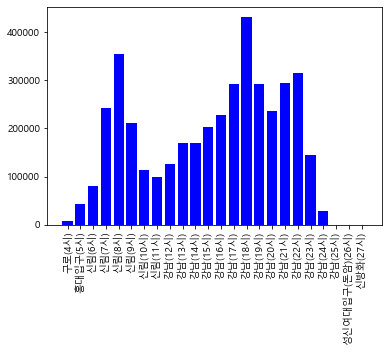

In [45]:
import csv;
import matplotlib.pyplot as plt

f = open('subwaytime.csv')
data = csv.reader(f)

# 헤더 (행) 2줄 제거
next(data)
next(data)

mx = [0] * 24
mx_station = [''] * 24

for row in data:
    #4열부터 int 형으로 변환
    row[4:] = map(int, row[4:])
    for i in range(24):
        a = row[i*2+4]
        if a > mx[i]:
            #최댓값, 최댓값의 해당 역, 호선 저장
            mx[i] = a
            mx_station[i] = row[3] + '(' + str(i+4) +'시)'
#print(mx_station , mx)

plt.rc('font', family = 'Malgun Gothic')
plt.bar(range(24), mx, color='b')
#시간대별 승차인원 1위를 차지한 역의 이름 출력
plt.xticks(range(24), mx_station, rotation=90)
plt.show()

모든 지하철역에서 시간대별 승하차 인원을 모두 더하여 출력

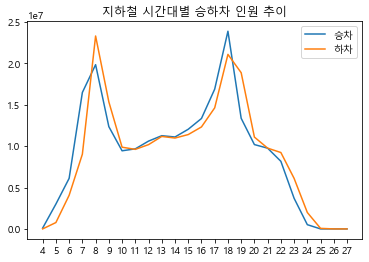

In [46]:
import csv;
import matplotlib.pyplot as plt

f = open('subwaytime.csv')
data = csv.reader(f)

# 헤더 (행) 2줄 제거
next(data)
next(data)

# 승차 인원을 저장할 리스트
s_in = [0] * 24
# 하차 인원을 저장할 리스트
s_out = [0] * 24

for row in data:
    row[4:] = map(int,row[4:])
    for i in range(24):
        #모든 역에 대해 시간대별 승차 인원, 하차 인원 누적해서 더하기
        s_in[i] += row[4+i*2]
        s_out[i] += row[5+i*2]

plt.rc('font', family = 'Malgun Gothic')
plt.title('지하철 시간대별 승하차 인원 추이') #제목 추가
plt.plot(s_in, label = '승차') #승차 인원 꺾은선 그래프
plt.plot(s_out, label = '하차') #하차 인원 꺾은선 그래프
plt.legend()
plt.xticks(range(24), range(4,28))
plt.show()